Tipo dos dados:
 <class 'numpy.ndarray'>
Escala dos dados:
 float64
O conjunto de dados é multivariado.
Número de exemplos por classe:
 0    50
1    50
2    50
Name: target, dtype: int64

Classe 0:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             5.00600          3.428000           1.462000   
std              0.35249          0.379064           0.173664   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.200000           1.400000   
50%              5.00000          3.400000           1.500000   
75%              5.20000          3.675000           1.575000   
max              5.80000          4.400000           1.900000   

       petal width (cm)  target  
count         50.000000    50.0  
mean           0.246000     0.0  
std            0.105386     0.0  
min            0.100000     0.0  
25%            0.200000     0.0  
50%        

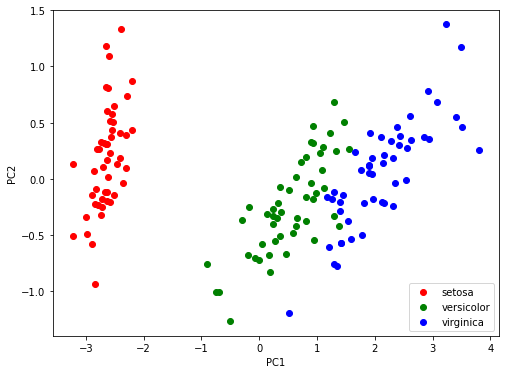

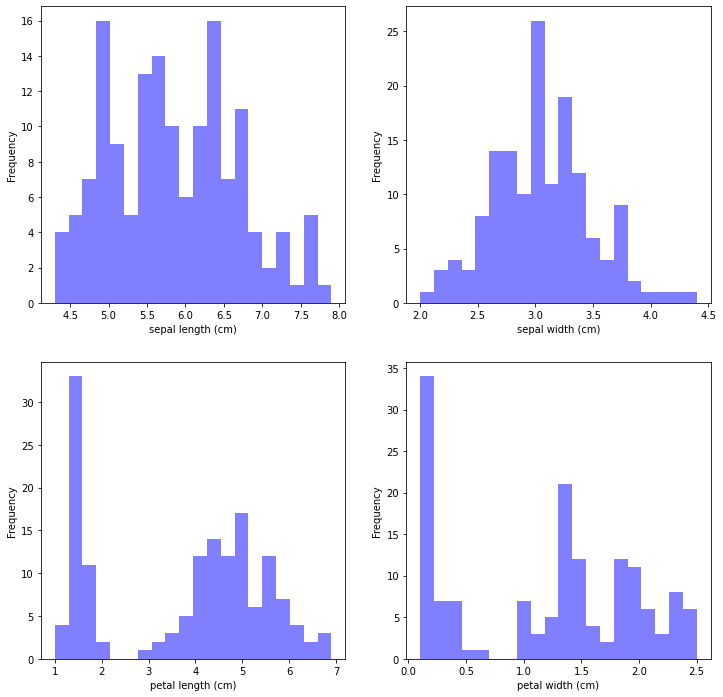

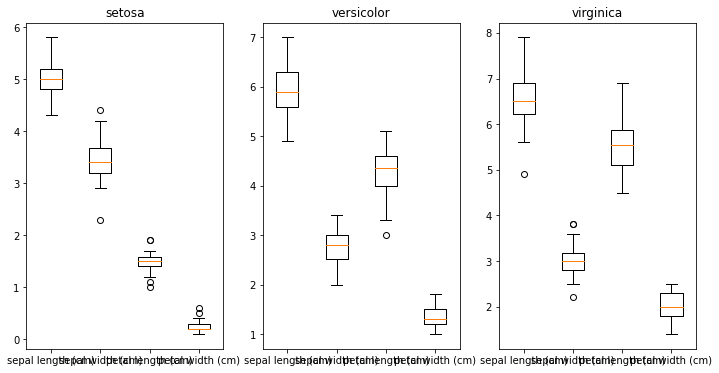

In [4]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Carregando o conjunto de dados
iris = load_iris()

# a. Caracterizando os dados quanto ao Tipo e Escala
print("Tipo dos dados:\n", type(iris['data']))
print("Escala dos dados:\n", iris['data'].dtype)

# b. Determinando se o conjunto de dados é univariado ou multivariado
if len(iris['feature_names']) == 1:
    print("O conjunto de dados é univariado.")
else:
    print("O conjunto de dados é multivariado.")

# c. Verificando a necessidade de balanceamento dos dados e caracterizando estatisticamente os dados
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
print("Número de exemplos por classe:\n", df['target'].value_counts())

# Estatísticas descritivas para cada classe
for i in np.unique(df['target']):
    print(f"\nClasse {i}:\n", df[df['target'] == i].describe())

# d. Analisando os dados quanto à sua incompletude, inconsistências, redundâncias e presença de ruído
print("Número de valores nulos em cada coluna:\n", df.isnull().sum())
print("Número de valores duplicados:\n", df.duplicated().sum())
print("Correlação entre as variáveis:\n", df.corr())

# e. Promovendo uma transformação de dados consistente com o banco sob análise
X = iris['data']
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)
df_transformed = pd.DataFrame(data=X_transformed, columns=['PC1', 'PC2'])
df_transformed['target'] = iris['target']

# f. Utilizando a análise de componentes principais (PCA) para gerar gráficos no espaço de atributos
colors = ['red', 'green', 'blue']
species = ['setosa', 'versicolor', 'virginica']

fig, ax = plt.subplots(figsize=(8,6))
for i in range(len(colors)):
    x = df_transformed[df_transformed['target']==i]['PC1']
    y = df_transformed[df_transformed['target']==i]['PC2']
    ax.scatter(x, y, color=colors[i], label=species[i])
    
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(12,12))
axs = axs.ravel()
for i, feature_name in enumerate(iris.feature_names):
    axs[i].hist(df[feature_name], bins=20, color='blue', alpha=0.5)
    axs[i].set_xlabel(feature_name)
    axs[i].set_ylabel('Frequency')

plt.show()

fig, axs = plt.subplots(1, 3, figsize=(12,6))
for i in range(len(species)):
    axs[i].boxplot(df[df['target']==i].iloc[:,:-1], labels=iris.feature_names)
    axs[i].set_title(species[i])

plt.show()
